In [122]:
import weibo as wb
import pandas as pd
import seaborn as sns
from pyecharts import Bar, Pie, Line, Graph, Overlap, WordCloud, EffectScatter
import matplotlib as plt
from IPython.display import Image
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [123]:
df_tw = pd.read_csv('dataset/data_presentation/results_tw.csv', encoding = 'gbk').fillna('')
df_hk = pd.read_csv('dataset/data_presentation/results_hk.csv', encoding = 'gbk').fillna('')
df_ml = pd.read_csv('dataset/data_presentation/results_ml.csv', encoding = 'gbk').fillna('')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-b69ee22c9e54>", line 1, in <module>
    df_tw = pd.read_csv('dataset/data_presentation/results_tw.csv', encoding = 'gbk').fillna('')
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 440, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 1014, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/linhuiqin

FileNotFoundError: File b'dataset/data_presentation/results_tw.csv' does not exist

In [124]:
df_concat = pd.concat([df_tw, df_hk, df_ml], ignore_index = True).drop_duplicates()

<font face="黑体" size=4 color=#3A5FCD > The process of data cleaning.

# 1

In [125]:
def year_quantity(df):
    years = []
    numbers = []
    for i in df['年份'].drop_duplicates().sort_values():
        tmp = df[df['年份'] == i]
        years.append(i)
        numbers.append(len(tmp))
    results = pd.DataFrame({'年份': years, '总部数': numbers})
    return results

In [126]:
def year_quality(df):
    years = []
    scores = []
    for i in df['年份'].drop_duplicates().sort_values():
        tmp = df[df['年份'] == i]
        score = tmp['豆瓣评分'].sum() / len(tmp)
        years.append(i)
        scores.append(round(score, 2))
    results = pd.DataFrame({'年份': years, '平均分': scores})
    return results

In [127]:
def display_overlap(df, area):
    x = df['年份'].drop_duplicates().sort_values().apply(str)
    y1 = year_quantity(df)['总部数']
    y2 = year_quality(df)['平均分']
    
    bar = Bar(area)
    bar.add('总部数', x, y1, label_color = ['#EBAA5F'])

    line = Line()
    line.add('平均分', x, y2, yaxis_min = 5, yaxis_max = 9, label_color = ['#8B3F2D'])
    
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line, yaxis_index = 1, is_add_yaxis = True)

    return overlap

In [128]:
display_overlap(df_tw, '台湾')

In [129]:
display_overlap(df_hk, '香港')

In [130]:
display_overlap(df_ml, '大陆')

<font face="黑体" size=4 color=#3A5FCD > In this chart, we see that compared to Taiwan and Hong Kong area, TV dramas in Mainland China have a low average DOUBAN grade.

# 2

In [131]:
tmp = df_concat[df_concat['年份'] > 2012]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-131-41aeb1a03539>", line 1, in <module>
    tmp = df_concat[df_concat['年份'] > 2012]
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/core/ops.py", line 1283, in wrapper
    res = na_op(values, other)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/core/ops.py", line 1143, in na_op
    result = _comp_method_OBJECT_ARRAY(op, x, y)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/core/ops.py", line 1122, in _comp_method_OBJECT_ARRAY
    result = libops.scalar_compare(x, y, op)
  File "pandas/_libs/ops.pyx", line 98, in pandas._libs.ops.scalar_compare
TypeError: '>' not supported between instances of 'str' and 'int'

During handling of the above exception, another exception occurred:

Traceback (most recent call l

TypeError: '>' not supported between instances of 'str' and 'int'

In [132]:
tmp[tmp['评价人数/人'] > 100000].sort_values(by = '豆瓣评分', ascending = True).head(3)

,剧名,年份,导演,编剧,主演,类型,制片国家/地区,集数,单集片长/分钟,豆瓣评分,评价人数/人
2154,深夜食堂,2017,蔡岳勋 / 胡涵清,陈怡方,黄磊 / 赵又廷 / 张钧甯 / 海清 / 何炅 / 陈意涵 / 马苏 / 刘昊然 / 萧敬...,剧情,中国大陆,36,45,2.8,104240
2155,漂亮的李慧珍,2017,赵晨阳,卢至柔 / 杨青,迪丽热巴 / 盛一伦 / 李溪芮 / 张彬彬 / 王骁 / 王一楠 / 任伟 / 王一菲 /...,喜剧 / 爱情,中国大陆,40,43,2.8,109354
2321,青云志,2016,朱锐斌 / 周远舟 / 刘国辉 / 朱少杰,邵潇逸 / 张少微 / 张戬,李易峰 / 赵丽颖 / 杨紫 / 舒畅 / 王源 / 王俊凯 / 易烊千玺 / 熊乃瑾 / ...,奇幻 / 武侠 / 古装,中国大陆,55,45,5.3,122359


In [133]:
tmp[tmp['评价人数/人'] > 100000].sort_values(by = '豆瓣评分', ascending = False).head(3)

,剧名,年份,导演,编剧,主演,类型,制片国家/地区,集数,单集片长/分钟,豆瓣评分,评价人数/人
2436,琅琊榜,2015,孔笙 / 李雪,海宴,胡歌 / 刘涛 / 王凯 / 陈龙 / 黄维德 / 靳东 / 高鑫 / 张_琰 / 张龄心 ...,剧情 / 古装,中国大陆,54,45,9.2,256604
1941,白夜追凶,2017,王伟,指纹 / 顾小白,潘粤明 / 王泷正 / 梁缘 / 吕晓霖 / 尹姝贻 / 侯雪龙 / 宋乃刚 / 王余阳 /...,剧情 / 悬疑 / 犯罪,中国大陆,32,45,9.0,245310
2444,伪装者,2015,李雪,张勇,胡歌 / 靳东 / 刘敏涛 / 王凯 / 宋轶 / 王乐君 / 王鸥 / 刘奕君 / 岳_ ...,剧情 / 悬疑,中国大陆,48,40,8.4,100309


<font face="黑体" size=4 color=#3A5FCD > In this part, we selected the most popular and high quality TV dramas, which quantified by grade over 8 and the number of grading people over 50,000. We called them BEST 48 and took them as the examples for FFSO. The detailed list is as fellows:

In [134]:
Image(filename = 'image/best48.png')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-134-de80ee20edfb>", line 1, in <module>
    Image(filename = 'image/best48.png')
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1151, in __init__
    metadata=metadata)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 609, in __init__
    self.reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1182, in reload
    super(Image,self).reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 634, in reload
    with open(self.filename, self._read_flags) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'image/best48.png'

During handling of the above exception, another exception occur

FileNotFoundError: [Errno 2] No such file or directory: 'image/best48.png'

# 3

In [78]:
def style_quantity(df):
    styles = []
    for i in df['类型']:
        style = i.split(' / ')
        for j in style:
            if j != '':
                styles.append(j)
    tmp = pd.DataFrame({'styles': styles})['styles'].value_counts()
    results = pd.DataFrame({'类型': tmp.index, '总部数': tmp.values})
    results.drop(0, inplace = True)
    return results

In [79]:
def display_bar(df, area):
    x = style_quantity(df)['类型'][:10]
    y = style_quantity(df)['总部数'][:10]
    bar = Bar(area)
    bar.add('总部数', x, y, is_label_show = True, xaxis_interval = 0,label_color =  ['#EBAA5F'])
    return bar

In [80]:
display_bar(df_tw, '台湾')

In [81]:
display_bar(df_hk, '香港')

In [82]:
display_bar(df_ml, '大陆')

<font face="黑体" size=4 color=#3A5FCD > The three column graphs below show the major categories of tv dramas in mainland, Hong Kong and Taiwan respectively. The height of the columns tells the number of each category being filmed. The graphs indicated clearly the similarities and differences among the markets. We can see that #Romance, Comedy, Costume stories dominate the markets, and #Homosexual is available only in TW, restricted in CN. 

In [83]:
name = style_quantity(df_concat)['类型']
value = style_quantity(df_concat)['总部数']
wordcloud = WordCloud('总体')
wordcloud.add('', name, value, shape = 'circle', word_size_range = [20, 100])

<font face="黑体" size=4 color=#3A5FCD > In the tag cloud, we aimed at determining the mostly film categories in all of the three markets, as a result of which, romance, costume and comedy stood out.

<font face="黑体" size=4 color=#3A5FCD > Then, we start to talk about the 3C. Here is the first C, Content. 
The two pie charts below are used to demonstrate the proportion of romantic dramas in all dramas, and in top rated dramas, so as to realise the “20/80 effect” of romantic dramas in China.

In [84]:
Image(filename = 'image/content.png')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-84-9cf0864ddd45>", line 1, in <module>
    Image(filename = 'image/content.png')
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1151, in __init__
    metadata=metadata)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 609, in __init__
    self.reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1182, in reload
    super(Image,self).reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 634, in reload
    with open(self.filename, self._read_flags) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'image/content.png'

During handling of the above exception, another exception occu

FileNotFoundError: [Errno 2] No such file or directory: 'image/content.png'

# 4

<font face="黑体" size=4 color=#3A5FCD > Now, we are going to talk about the second C, Cast. 

In [85]:
def actor_score_number(df):
    actors = []
    scores = []
    for i in df.index:
        tmp = (df['主演'][i].split(' / '), df['豆瓣评分'][i])
        for actor in tmp[0]:
            if actor != '':
                actors.append(actor)
                scores.append(tmp[1])
    datas = pd.DataFrame({'actors': actors, 'scores': scores})
    actors = datas.actors.drop_duplicates()
    my1 = []
    my2 = []
    my3 = []
    for actor in actors:
        my1.append(actor)
        tmp = datas[datas.actors == actor]
        my2.append(round(tmp.scores.sum() / len(tmp), 2))
        my3.append(len(tmp))
    results = pd.DataFrame({'演员': my1, '平均分': my2, '部数': my3}).sort_values('平均分', ascending = False)
    return results

In [86]:
# actor_score_number(df_concat).to_csv('dataset/演员-平均分-部数.csv', index = False, encoding = 'gbk')

In [87]:
df = pd.read_csv(open('dataset/演员-平均分-部数.csv',encoding = 'gbk'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-87-00f9ae2aa37c>", line 1, in <module>
    df = pd.read_csv(open('dataset/演员-平均分-部数.csv',encoding = 'gbk'))
FileNotFoundError: [Errno 2] No such file or directory: 'dataset/演员-平均分-部数.csv'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_geti

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/演员-平均分-部数.csv'

<font face="黑体" size=4 color=#3A5FCD > We culculated the average of one actor's all works' DOUBAN grade and take it as the indicator of this actors' acting ability. Then we found that young actor's performance is related to their work quantity. We took the the top trending Weibo stars as example.

In [88]:
wb90s = pd.DataFrame({'演员': [item[0] for item in wb.weibo90s().items()], '粉丝数': [item[1] for item in wb.weibo90s().items()]})
wbfans30 = pd.DataFrame({'演员': [item[0] for item in wb.weibofans30().items()], '粉丝数': [item[1] for item in wb.weibofans30().items()]})
wb90s = pd.merge(wb90s, df)
wbfans30 = pd.merge(wbfans30, df)

In [89]:
def display_overlap(df, name):
    x = df['演员']
    y1 = df['部数']
    y2 = df['平均分']
    bar = Bar(name, '注：横坐标依据粉丝数从大到小排列')
    line = Line()
    bar.add('部数', x, y1, xaxis_interval = 0, is_datazoom_show = True, datazoom_range = [0, 50])
    line.add('平均分', x, y2, is_label_show = True,yaxis_min = 0, yaxis_max = 10)
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line, yaxis_index = 1, is_add_yaxis = True)
    return overlap

<font face="黑体" size=4 color=#3A5FCD > In accordance with the top trending Weibo stars in China and the list of mostly seen actors/actresses in the low rated dramas, the graph below implies the relationship between number of dramas played and average rating to demonstrate that experiences help improve their performances.

In [90]:
display_overlap(wb90s, '微博九零后')

In [91]:
display_overlap(wbfans30, '微博粉丝榜')

In [92]:
# actor_score_number(df_tw).to_csv('dataset/data_presentation/asn_tw.csv', index = False, encoding = 'gbk')
# actor_score_number(df_hk).to_csv('dataset/data_presentation/asn_hk.csv', index = False, encoding = 'gbk')
# actor_score_number(df_ml).to_csv('dataset/data_presentation/asn_ml.csv', index = False, encoding = 'gbk')

In [93]:
asn_tw = pd.read_csv('dataset/data_presentation/asn_tw.csv',encoding = 'gbk')
asn_hk = pd.read_csv('dataset/data_presentation/asn_hk.csv',encoding = 'gbk')
asn_ml = pd.read_csv('dataset/data_presentation/asn_ml.csv',encoding = 'gbk')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-93-bc9acdd4e246>", line 1, in <module>
    asn_tw = pd.read_csv('dataset/data_presentation/asn_tw.csv',encoding = 'gbk')
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 440, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 1014, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/linhuiqing/venv/lib/pytho

FileNotFoundError: File b'dataset/data_presentation/asn_tw.csv' does not exist

In [94]:
def df_clean(df):
    df = df[df['部数'] > 3].sort_values(by = '部数', ascending = False).head(10)
    return df

In [95]:
def display_overlap(df, name):
    x = df['演员']
    y1 = df['部数']
    y2 = df['平均分']
    bar = Bar(name, '注：横坐标依据电视剧部数从大到小排列')
    line = Line()
    bar.add('部数', x, y1, xaxis_interval = 0)
    line.add('平均分', x, y2, is_label_show = True,yaxis_min = 0, yaxis_max = 10)
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line, yaxis_index = 1, is_add_yaxis = True)
    return overlap

<font face="黑体" size=4 color=#3A5FCD > The following column charts show the number of dramas played by the top rated actors/actresses as well as their scores in mainland, Hong Kong and Taiwan respectively that further justify experiences matter.

In [96]:
display_overlap(df_clean(asn_tw), '台湾')

In [97]:
display_overlap(df_clean(asn_hk), '香港')

In [98]:
display_overlap(df_clean(asn_ml), '大陆')

# 5

<font face="黑体" size=4 color=#3A5FCD > We also want to know the relationship between actors with good performance.

In [99]:
df_hot = df_concat[df_concat['评价人数/人'] > 100000]

In [100]:
def actor_number(df):
    actors = []
    for i in df['主演']:
        tmp = i.split(' / ')
        for actor in tmp:
            if (actor != '') & (actor.find('_') == -1):
                actors.append(actor)
    datas = pd.DataFrame({'actors': actors})
    results = pd.DataFrame({'演员': datas.actors.value_counts().index, '部数': datas.actors.value_counts().values})
    results = results[results['部数'] > 1]
    return results

In [101]:
def find_nodes(df):
    tmp = actor_number(df)
    nodes = []
    for i in tmp.index:
        dic = {}
        dic['name'] = tmp['演员'][i]
        dic['value'] = tmp['部数'][i]
        dic['symbolSize'] = tmp['部数'][i] * 3
        nodes.append(dic)
    return nodes

In [102]:
nodes_hot = find_nodes(df_hot)

In [103]:
def actor_list(df):
    results = []
    for actors in df['主演']:
        if actors != '':
            result = []
            for actor in actors.split(' / '):
                if (actor != '') & (actor.find('_') == -1):
                    result.append(actor)
            results.append(result)
    return results

In [104]:
def find_df(df):
    tmp = actor_list(df)
    source = []
    target = []
    for actors in tmp:
        for i in range(len(actors)-1):
            for j in actors[i+1:]:
                source.append(actors[i])
                target.append(j)
    results = pd.DataFrame({'source': source, 'target': target})
    return results

In [105]:
links_hot = []
for index, row in find_df(df_hot).iterrows():
    source = row.source
    target = row.target
    links_hot.append({'source': source, 'target': target})

In [106]:
def display_graph(nodes, links):
    graph = Graph('热门电视剧演员关系图')
    graph.add('', nodes, links)
    return graph

In [107]:
display_graph(nodes_hot, links_hot).render('热门电视剧演员关系图.html')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-107-6d6e280c8f71>", line 1, in <module>
    display_graph(nodes_hot, links_hot).render('热门电视剧演员关系图.html')
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pyecharts/base.py", line 146, in render
    **kwargs
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pyecharts/engine.py", line 221, in render_chart_to_file
    utils.write_utf8_html_file(path, html)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pyecharts/utils/__init__.py", line 57, in write_utf8_html_file
    with codecs.open(file_name, "w+", encoding="utf-8") as html_file:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/codecs.py", line 898, in open
    file = builtins.open(filename, mode, buffering)
FileNotFoundError: [Errno 2] No such file or dire

FileNotFoundError: [Errno 2] No such file or directory: '热门电视剧演员关系图.html'

<font face="黑体" size=4 color=#3A5FCD > Above is the relation map(below is a screenshot)  of actor Jin Dong with regards to its cooperations in tv dramas with other actors and actresses, as the sizes of the spots indicate the times of cooperation between the two actors/actresses and the distances between the spots imply the closeness, which is aiming at proving that personal or professional relationship between actors and actresses are helpful.

In [108]:
Image(filename = 'image/actorsrelation.png')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-108-3f74fed35893>", line 1, in <module>
    Image(filename = 'image/actorsrelation.png')
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1151, in __init__
    metadata=metadata)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 609, in __init__
    self.reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1182, in reload
    super(Image,self).reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 634, in reload
    with open(self.filename, self._read_flags) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'image/actorsrelation.png'

During handling of the above exception, another

FileNotFoundError: [Errno 2] No such file or directory: 'image/actorsrelation.png'

# 6

In [109]:
datas = pd.read_csv('dataset/tmp.csv', encoding = 'gbk')
results = pd.DataFrame(index = datas['年份'].drop_duplicates().sort_values())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-109-2a1090f956c7>", line 1, in <module>
    datas = pd.read_csv('dataset/tmp.csv', encoding = 'gbk')
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 440, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/pandas/io/parsers.py", line 1014, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/p

FileNotFoundError: File b'dataset/tmp.csv' does not exist

In [110]:
def add_column(area):
    column = []
    for year in results.index:
        column.append(len(datas[(datas['年份'] == year) & (datas['制片国家/地区'] == area)]))
    results[area] = column

In [111]:
areas = ['香港 / 台湾', '中国大陆 / 香港', '中国大陆 / 台湾', '中国大陆 / 香港 / 台湾']
for area in areas:
    add_column(area)

In [112]:
results

,香港 / 台湾,中国大陆 / 香港,中国大陆 / 台湾,中国大陆 / 香港 / 台湾
年份,,,,
1986,0,2,0,0
1990,0,1,0,0
1991,0,0,1,0
1993,1,1,0,1
1994,0,0,0,1
1995,1,1,2,0
1996,1,4,1,2
1997,0,3,0,0
1998,1,2,5,1


In [113]:
es = EffectScatter('三地合作情况图', '注：纵坐标代表合作程度，值越大表示合作次数越多')
x = results.index
def add_es(area):
    values = []
    for value in results[area].values:
        if value == 0:
            values.append(None)
        else:
            values.append(value)
    y = values
    es.add(area, x, y, xaxis_min = 1985, xaxis_max = 2020, xaxis_force_interval = 5)

In [114]:
for area in areas:
    add_es(area)

In [115]:
es

# 7

<font face="黑体" size=4 color=#3A5FCD > The last C, it's the Channel. We noticed that in mainland China, online show is more and more popular.
The scatter plot below shows the result of top rated tv dramas in mainland 2017 according to douban, with x axis of its score and y axis of its number of reviews. From which we can tell one out of top three is online show, suggesting online shows can be reputation promising.

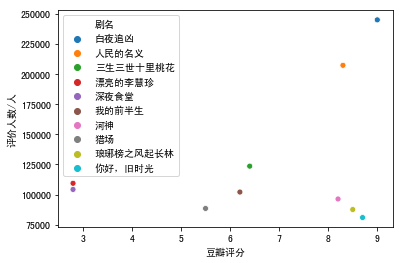

In [116]:
df_ml['年份'] = df_ml['年份'].apply(str)
df_ml2017 = df_ml[df_ml['年份'] == '2017']
top10 = df_ml2017.sort_values(by = '评价人数/人', ascending = False).head(10)
axes = sns.scatterplot(x = '豆瓣评分', y = '评价人数/人', hue = '剧名', data = top10)

<font face="黑体" size=4 color=#3A5FCD > We found that in 2017, 1 in top 3 is online show, and in 2018, 2 in top 3 are online show.

In [117]:
Image(filename = 'image/online.png')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-117-3f5e6c18fbd9>", line 1, in <module>
    Image(filename = 'image/online.png')
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1151, in __init__
    metadata=metadata)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 609, in __init__
    self.reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1182, in reload
    super(Image,self).reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 634, in reload
    with open(self.filename, self._read_flags) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'image/online.png'

During handling of the above exception, another exception occur

FileNotFoundError: [Errno 2] No such file or directory: 'image/online.png'

<font face="黑体" size=4 color=#3A5FCD >Finally, we got the 3C formula to creat soap operas with both fame and fortune:

In [118]:
Image(filename = 'image/formula.png')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-118-2230b4fd80df>", line 1, in <module>
    Image(filename = 'image/formula.png')
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1151, in __init__
    metadata=metadata)
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 609, in __init__
    self.reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 1182, in reload
    super(Image,self).reload()
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/IPython/core/display.py", line 634, in reload
    with open(self.filename, self._read_flags) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'image/formula.png'

During handling of the above exception, another exception occ

FileNotFoundError: [Errno 2] No such file or directory: 'image/formula.png'